#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import time

In [40]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  # tworzenie permutacji 0 i 1
  def create_all_combinatnions(self) -> list:
      combinations = list(product([0, 1], repeat=len(self.weights)))

      comb_array = [np.array(combination) for combination in combinations]

      return comb_array

  # znajdujemy najlepsze połączenie przedmiotów
  def find_best_permutation(self) -> list:
      combinations_list = self.create_all_combinatnions()
      max_profit = 0

      for permutation in combinations_list:
          items = self.weights * permutation
          items_weight = items.sum()

          if items_weight <= self.capacity:
              items_profits = (self.profits * permutation).sum()

          if items_profits > max_profit:
              max_profit = items_profits
              best_combination = permutation

      return best_combination, max_profit

  def solve_knapsack_brute_force(self) -> list:
      best_combination = self.find_best_permutation()[0]
      max_profit = self.find_best_permutation()[1]

      selected_items = [index for index, value in enumerate(best_combination) if value == 1]

      return selected_items, max_profit

  # zwraca array profit/waga
  def calculate_profit_to_weight_ratio(self) -> list:
      return self.profits / self.weights

  # zwraca indeksy malejąco profitem
  def descending_order_of_ratios(self) -> list:
      ratios = self.calculate_profit_to_weight_ratio()
      sorted_index = np.argsort(ratios)[::-1]

      return sorted_index

  def solve_knapsack_pw_ratio(self) -> list:
      sorted_elements = self.descending_order_of_ratios()

      # zmienne pomocnicze
      current_profit = 0
      indexes = [0] * len(self.weights)

      for index in sorted_elements:
          if self.weights[index] <= self.capacity:
              indexes[index] = 1
              current_profit += self.profits[index]
              self.capacity -= self.weights[index]
          else:
            continue

      return [index for index, value in enumerate(indexes) if value == 1], current_profit


In [7]:
timer = []
amount_of_items = []

In [41]:
weights = np.array([8, 3, 5, 2, 3, 1, 6, 1, 9, 5, 2, 1, 6, 1])
capacity = 9
profits = np.array([16, 8, 9, 6, 3, 2, 8, 1, 6, 14, 7, 4, 1, 1])

A = KnapSack(profits, weights, capacity)
print("Brute Force : ", A.solve_knapsack_brute_force())
print("PW Ratio : ", A.solve_knapsack_pw_ratio())

Brute Force :  ([5, 9, 10, 11], 27)
PW Ratio :  ([1, 3, 5, 10, 11], 27)


In [43]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])
A = KnapSack(profits, weights, capacity)
print("Brute Force : ", A.solve_knapsack_brute_force())
print("PW Ratio : ", A.solve_knapsack_pw_ratio())

Brute Force :  ([1, 2], 17)
PW Ratio :  ([1, 3], 14)


In [5]:
def calculate_time(weights: list, profits: list, capacity: list) -> float:
    knapsack = KnapSack(profits, weights, capacity)

    start_time = time.time()
    knapsack.solve_knapsack_brute_force()
    end_time = time.time()

    execution_time = end_time - start_time
    return execution_time

In [29]:
timer.append(calculate_time(weights, profits, capacity))
amount_of_items.append(len(weights))
print(timer)
print(amount_of_items)

[0.00025463104248046875, 0.0003025531768798828, 0.00033211708068847656, 0.0009529590606689453, 0.0018219947814941406, 0.003770112991333008, 0.0040552616119384766, 0.009543418884277344, 0.024737834930419922, 0.07718443870544434, 0.08229207992553711]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


MAKING THE PLOT


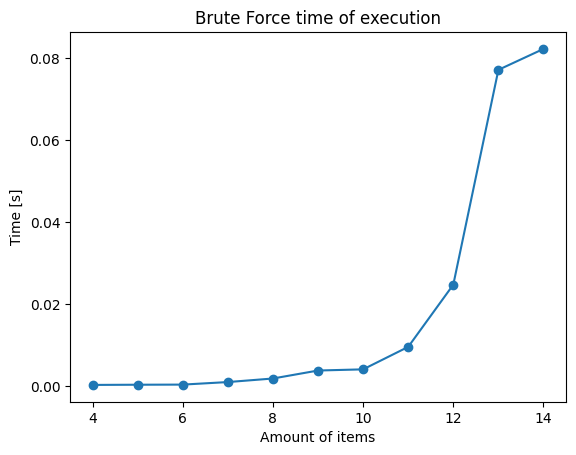

In [30]:
plt.plot(amount_of_items, timer, marker="o")
plt.title('Brute Force time of execution')
plt.xlabel("Amount of items")
plt.ylabel("Time [s]")
plt.show()

Wyszukiwanie przy użyciu heurystyki często daje błędne wyniki, ponieważ nie sprawdza wszystkich możliwości i często zostawia wolne miejsce, które mogłoby zostać zapełnione innym przedmiotem o mniejszym stosunku zysku do wagi. Widać, że dla metody brute force czas rośnie wykładniczo